In [17]:
import pandas as pd
from collections import Counter


In [18]:
df = pd.read_csv('framingham.csv')
df.fillna(df.median(), inplace=True)

In [19]:
df.isna().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [20]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
counter = Counter(y_train)
print(f'Before: {counter}')
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
counter = Counter(y_train_sm)
print(f'After: {counter}')

Before: Counter({0: 2870, 1: 520})
After: Counter({0: 2870, 1: 2870})


In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_sm, y_train_sm)



LogisticRegression()

In [24]:
y_pred = model.predict(X_test)


In [25]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6356132075471698
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       724
           1       0.23      0.63      0.34       124

    accuracy                           0.64       848
   macro avg       0.57      0.63      0.54       848
weighted avg       0.81      0.64      0.69       848



In [35]:
print('                Predicted Negative    Predicted Positive')
print('Actual Negative           TN                    FP')
print('Actual Positive           FN                    TP')

                Predicted Negative    Predicted Positive
Actual Negative           TN                    FP
Actual Positive           FN                    TP


Confusion Matrix:
[[461 263]
 [ 46  78]]


                Predicted Negative    Predicted Positive
Actual Negative           TN                    FP
Actual Positive           FN                    TP


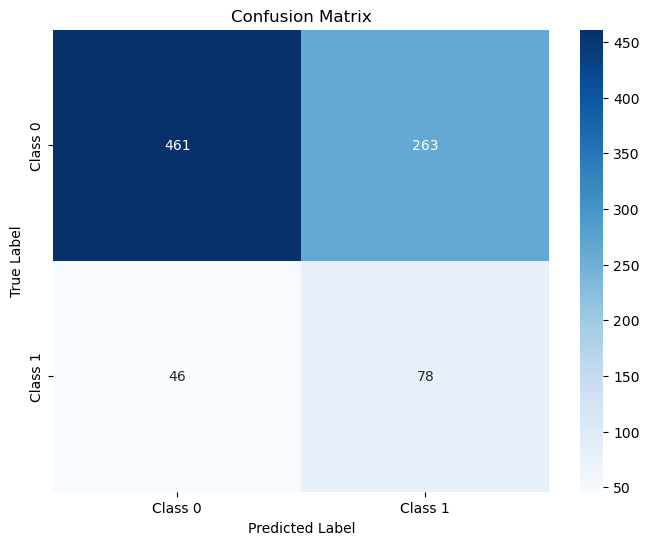

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print('\n')
print('                Predicted Negative    Predicted Positive')
print('Actual Negative           TN                    FP')
print('Actual Positive           FN                    TP')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


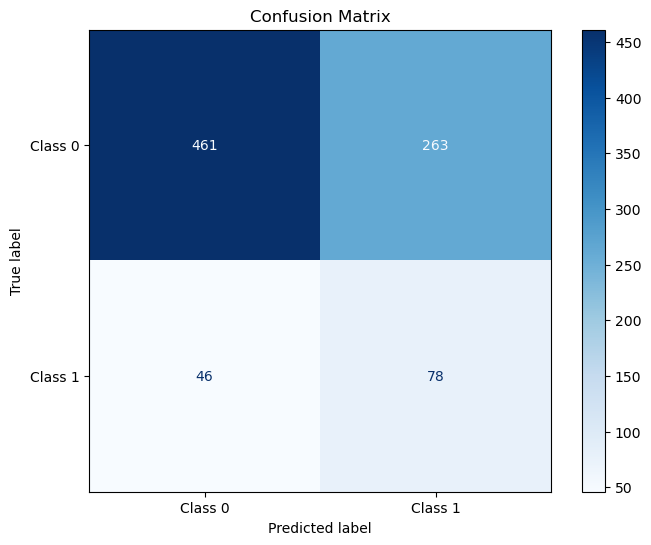

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming you already have the confusion matrix 'cm'
# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(cmap='Blues', ax=ax)  # You can specify other parameters like cmap (color map)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
counter = Counter(y_train)
print(f'Before: {counter}')
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state = 130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
counter = Counter(y_train_ada)
print(f'After: {counter}')

Before: Counter({0: 2870, 1: 520})
After: Counter({1: 2892, 0: 2870})


In [ ]:
model = LogisticRegression()
model.fit(X_train_ada, y_train_ada)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6261792452830188
              precision    recall  f1-score   support

           0       0.92      0.61      0.74       724
           1       0.24      0.69      0.35       124

    accuracy                           0.63       848
   macro avg       0.58      0.65      0.54       848
weighted avg       0.82      0.63      0.68       848



In [ ]:
counter = Counter(y_train)
print(f'Before: {counter}')

from imblearn.combine import SMOTETomek

smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print(f'After: {counter}')
print('\n')

model = LogisticRegression()
model.fit(X_train_smtom, y_train_smtom)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Before: Counter({0: 2870, 1: 520})
After: Counter({1: 2892, 0: 2870})


Accuracy: 0.6450471698113207
              precision    recall  f1-score   support

           0       0.91      0.65      0.76       724
           1       0.24      0.65      0.35       124

    accuracy                           0.65       848
   macro avg       0.58      0.65      0.55       848
weighted avg       0.81      0.65      0.70       848



In [ ]:
counter = Counter(y_train)
print(f'Before: {counter}')

from imblearn.combine import SMOTEENN

smeen = SMOTEENN(random_state=130)
X_train_smeen, y_train_smeen = smeen.fit_resample(X_train, y_train)

counter = Counter(y_train_smeen)
print(f'After: {counter}')
print('\n')


model = LogisticRegression()
model.fit(X_train_smeen, y_train_smeen)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Before: Counter({0: 2870, 1: 520})
After: Counter({1: 2676, 0: 1496})


Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.93      0.45      0.61       724
           1       0.20      0.79      0.32       124

    accuracy                           0.50       848
   macro avg       0.56      0.62      0.46       848
weighted avg       0.82      0.50      0.56       848

